# INTRODUCTION
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Read Data

In [2]:
# We are reading our data
df = pd.read_csv("./heart_di.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

## Data Exploration

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

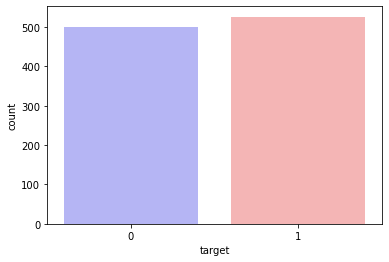

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


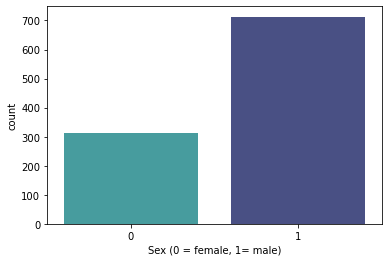

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


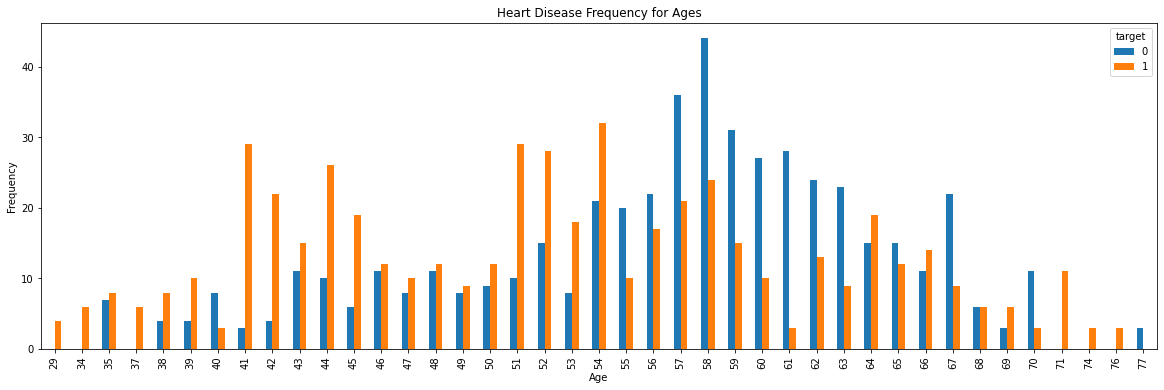

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

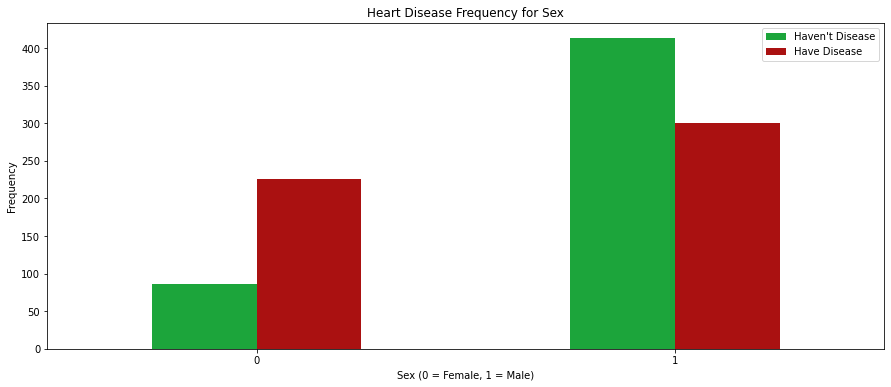

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

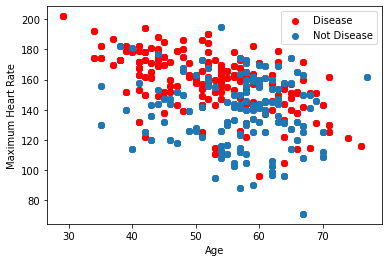

In [11]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

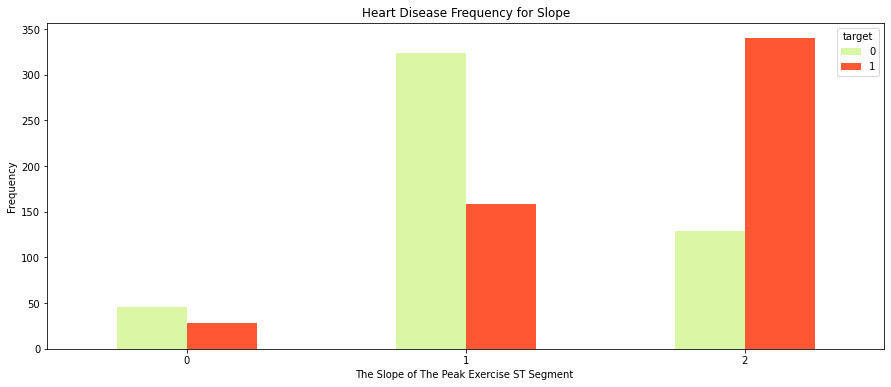

In [12]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

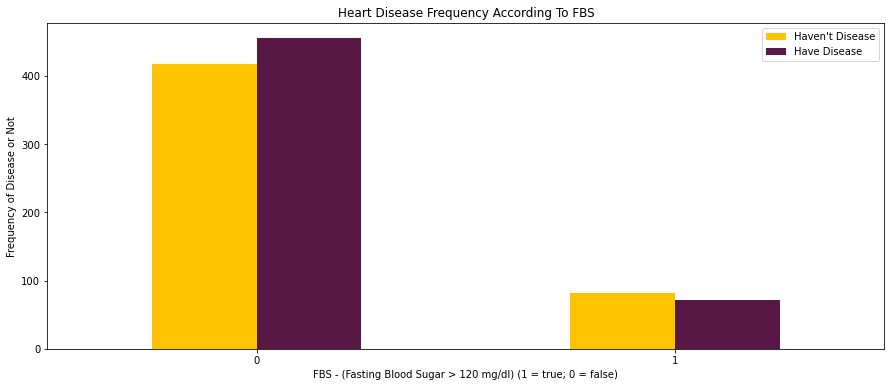

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

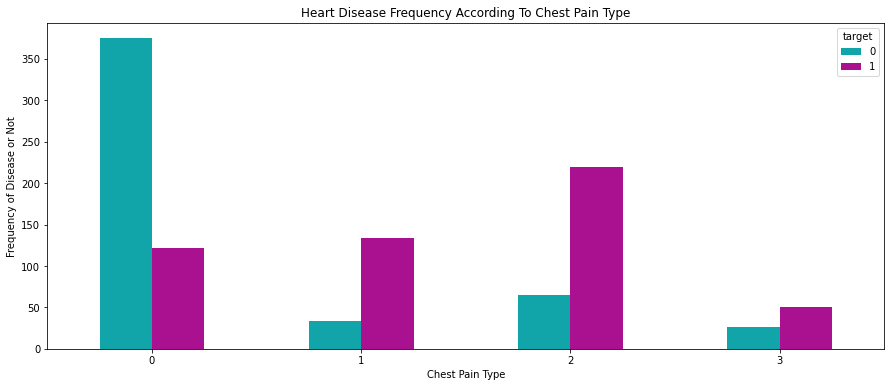

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

![](http://)Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [15]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [16]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [17]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [18]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [19]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

C:\Users\91830\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\91830\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\91830\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=0)

In [21]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [22]:
accuracies = dict()

Let's say weight = 0.01 and bias = 0.0

## K-Nearest Neighbour (KNN) Classification
<br>
Let's see what will be score if we use KNN algorithm.

**KNN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [23]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
start_time = time.time()
knn.fit(x_train.T, y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

Time consumed to fit model:  00:00:00
2 NN Score: 96.10%


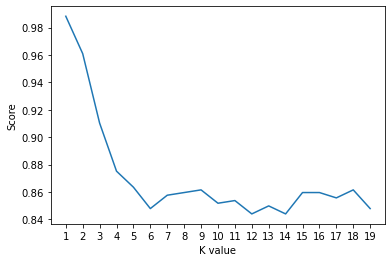

Maximum KNN Score is 98.83%


In [24]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show() 

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 3-7-8 we will reach maximum score. <br>
## <font color="green">KNN Model's Accuracy is <font color="red">98.83%</font></font>

## Support Vector Machine (SVM) Algorithm 
Now we will use SVM algorithm. 

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC(random_state = 1)
start_time = time.time()
svm.fit(x_train.T, y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Test Accuracy of SVM Algorithm: 88.89%


In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': np.linspace(0.001, 100, 100),
              'gamma': np.linspace(0.001, 100, 100)}

cv = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=1000, cv=2, verbose=2)
cv.fit(x,y)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits
[CV] END ...................C=0.001, gamma=4.041363636363637; total time=   0.0s
[CV] END ...................C=0.001, gamma=4.041363636363637; total time=   0.0s
[CV] END ......C=13.132181818181818, gamma=54.54590909090909; total time=   0.0s
[CV] END ......C=13.132181818181818, gamma=54.54590909090909; total time=   0.0s
[CV] END .......C=84.84863636363637, gamma=52.52572727272727; total time=   0.0s
[CV] END .......C=84.84863636363637, gamma=52.52572727272727; total time=   0.0s
[CV] END .......C=81.81836363636364, gamma=58.58627272727273; total time=   0.0s
[CV] END .......C=81.81836363636364, gamma=58.58627272727273; total time=   0.0s
[CV] END .......C=17.172545454545457, gamma=98.9899090909091; total time=   0.0s
[CV] END .......C=17.172545454545457, gamma=98.9899090909091; total time=   0.0s
[CV] END .......C=70.70736363636365, gamma=64.64681818181819; total time=   0.0s
[CV] END .......C=70.70736363636365, gamma=6

[CV] END ......C=97.97981818181819, gamma=17.172545454545457; total time=   0.0s
[CV] END ......C=42.42481818181818, gamma=40.404636363636364; total time=   0.0s
[CV] END ......C=42.42481818181818, gamma=40.404636363636364; total time=   0.0s
[CV] END .......C=1.011090909090909, gamma=6.061545454545455; total time=   0.0s
[CV] END .......C=1.011090909090909, gamma=6.061545454545455; total time=   0.0s
[CV] END .......C=80.80827272727274, gamma=74.74772727272727; total time=   0.0s
[CV] END .......C=80.80827272727274, gamma=74.74772727272727; total time=   0.0s
[CV] END ......C=68.68718181818183, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=68.68718181818183, gamma=30.303727272727276; total time=   0.0s
[CV] END .......C=47.47527272727273, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=47.47527272727273, gamma=39.39454545454546; total time=   0.0s
[CV] END ........C=65.6569090909091, gamma=42.42481818181818; total time=   0.0s
[CV] END ........C=65.656909

[CV] END ........C=96.96972727272728, gamma=98.9899090909091; total time=   0.0s
[CV] END .......C=7.071636363636364, gamma=25.25327272727273; total time=   0.0s
[CV] END .......C=7.071636363636364, gamma=25.25327272727273; total time=   0.0s
[CV] END ........C=65.6569090909091, gamma=84.84863636363637; total time=   0.0s
[CV] END ........C=65.6569090909091, gamma=84.84863636363637; total time=   0.0s
[CV] END ........C=98.9899090909091, gamma=63.63672727272728; total time=   0.0s
[CV] END ........C=98.9899090909091, gamma=63.63672727272728; total time=   0.0s
[CV] END .....C=43.434909090909095, gamma=40.404636363636364; total time=   0.0s
[CV] END .....C=43.434909090909095, gamma=40.404636363636364; total time=   0.0s
[CV] END .......C=25.25327272727273, gamma=81.81836363636364; total time=   0.0s
[CV] END .......C=25.25327272727273, gamma=81.81836363636364; total time=   0.0s
[CV] END ......C=82.82845454545455, gamma=33.333999999999996; total time=   0.0s
[CV] END ......C=82.82845454

[CV] END .......C=80.80827272727274, gamma=83.83854545454547; total time=   0.0s
[CV] END .......C=80.80827272727274, gamma=83.83854545454547; total time=   0.0s
[CV] END ......C=39.39454545454546, gamma=40.404636363636364; total time=   0.0s
[CV] END ......C=39.39454545454546, gamma=40.404636363636364; total time=   0.0s
[CV] END ..................C=0.001, gamma=50.505545454545455; total time=   0.0s
[CV] END ..................C=0.001, gamma=50.505545454545455; total time=   0.0s
[CV] END .......C=47.47527272727273, gamma=27.27345454545455; total time=   0.0s
[CV] END .......C=47.47527272727273, gamma=27.27345454545455; total time=   0.0s
[CV] END .......C=37.37436363636363, gamma=79.79818181818183; total time=   0.0s
[CV] END .......C=37.37436363636363, gamma=79.79818181818183; total time=   0.0s
[CV] END ......C=23.23309090909091, gamma=33.333999999999996; total time=   0.0s
[CV] END ......C=23.23309090909091, gamma=33.333999999999996; total time=   0.0s
[CV] END ......C=33.33399999

[CV] END .......C=94.94954545454547, gamma=7.071636363636364; total time=   0.0s
[CV] END ......C=79.79818181818183, gamma=40.404636363636364; total time=   0.0s
[CV] END ......C=79.79818181818183, gamma=40.404636363636364; total time=   0.0s
[CV] END ......C=57.576181818181816, gamma=4.041363636363637; total time=   0.0s
[CV] END ......C=57.576181818181816, gamma=4.041363636363637; total time=   0.0s
[CV] END ......C=90.90918181818182, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=90.90918181818182, gamma=29.293636363636367; total time=   0.0s
[CV] END .......C=58.58627272727273, gamma=82.82845454545455; total time=   0.0s
[CV] END .......C=58.58627272727273, gamma=82.82845454545455; total time=   0.0s
[CV] END .......C=97.97981818181819, gamma=84.84863636363637; total time=   0.0s
[CV] END .......C=97.97981818181819, gamma=84.84863636363637; total time=   0.0s
[CV] END .........C=86.8688181818182, gamma=65.6569090909091; total time=   0.0s
[CV] END .........C=86.86881

[CV] END ......C=85.85872727272728, gamma=15.152363636363637; total time=   0.0s
[CV] END ......C=85.85872727272728, gamma=15.152363636363637; total time=   0.0s
[CV] END ........C=86.8688181818182, gamma=63.63672727272728; total time=   0.0s
[CV] END ........C=86.8688181818182, gamma=63.63672727272728; total time=   0.0s
[CV] END ..................C=0.001, gamma=16.162454545454548; total time=   0.0s
[CV] END ..................C=0.001, gamma=16.162454545454548; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=59.59636363636364; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=59.59636363636364; total time=   0.0s
[CV] END ........C=86.8688181818182, gamma=61.61654545454545; total time=   0.0s
[CV] END ........C=86.8688181818182, gamma=61.61654545454545; total time=   0.0s
[CV] END .......C=7.071636363636364, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=7.071636363636364, gamma=80.80827272727274; total time=   0.0s
[CV] END ......C=50.50554545

[CV] END .......C=92.92936363636365, gamma=42.42481818181818; total time=   0.0s
[CV] END .......C=92.92936363636365, gamma=42.42481818181818; total time=   0.0s
[CV] END .......C=42.42481818181818, gamma=85.85872727272728; total time=   0.0s
[CV] END .......C=42.42481818181818, gamma=85.85872727272728; total time=   0.0s
[CV] END ......C=6.061545454545455, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=6.061545454545455, gamma=29.293636363636367; total time=   0.0s
[CV] END .......C=95.95963636363638, gamma=8.081727272727273; total time=   0.0s
[CV] END .......C=95.95963636363638, gamma=8.081727272727273; total time=   0.0s
[CV] END ..................C=45.455090909090906, gamma=100.0; total time=   0.0s
[CV] END ..................C=45.455090909090906, gamma=100.0; total time=   0.0s
[CV] END .......C=41.41472727272727, gamma=93.93945454545455; total time=   0.0s
[CV] END .......C=41.41472727272727, gamma=93.93945454545455; total time=   0.0s
[CV] END .......C=9.09181818

[CV] END ...............................C=0.001, gamma=100.0; total time=   0.0s
[CV] END ......C=60.60645454545455, gamma=18.182636363636366; total time=   0.0s
[CV] END ......C=60.60645454545455, gamma=18.182636363636366; total time=   0.0s
[CV] END .......C=9.091818181818182, gamma=70.70736363636365; total time=   0.0s
[CV] END .......C=9.091818181818182, gamma=70.70736363636365; total time=   0.0s
[CV] END ......C=80.80827272727274, gamma=33.333999999999996; total time=   0.0s
[CV] END ......C=80.80827272727274, gamma=33.333999999999996; total time=   0.0s
[CV] END ......C=97.97981818181819, gamma=38.384454545454545; total time=   0.0s
[CV] END ......C=97.97981818181819, gamma=38.384454545454545; total time=   0.0s
[CV] END ......C=35.35418181818182, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=35.35418181818182, gamma=29.293636363636367; total time=   0.0s
[CV] END .......C=96.96972727272728, gamma=72.72754545454546; total time=   0.0s
[CV] END .......C=96.9697272

[CV] END ......C=85.85872727272728, gamma=40.404636363636364; total time=   0.0s
[CV] END ......C=85.85872727272728, gamma=40.404636363636364; total time=   0.0s
[CV] END .......C=90.90918181818182, gamma=89.89909090909092; total time=   0.0s
[CV] END .......C=90.90918181818182, gamma=89.89909090909092; total time=   0.0s
[CV] END ......C=12.12209090909091, gamma=43.434909090909095; total time=   0.0s
[CV] END ......C=12.12209090909091, gamma=43.434909090909095; total time=   0.0s
[CV] END ........C=7.071636363636364, gamma=86.8688181818182; total time=   0.0s
[CV] END ........C=7.071636363636364, gamma=86.8688181818182; total time=   0.0s
[CV] END ......C=69.69727272727273, gamma=14.142272727272728; total time=   0.0s
[CV] END ......C=69.69727272727273, gamma=14.142272727272728; total time=   0.0s
[CV] END ........C=87.8789090909091, gamma=78.78809090909093; total time=   0.0s
[CV] END ........C=87.8789090909091, gamma=78.78809090909093; total time=   0.0s
[CV] END .......C=4.04136363

[CV] END .......C=61.61654545454545, gamma=42.42481818181818; total time=   0.0s
[CV] END .......C=32.32390909090909, gamma=85.85872727272728; total time=   0.0s
[CV] END .......C=32.32390909090909, gamma=85.85872727272728; total time=   0.0s
[CV] END ...................C=100.0, gamma=42.42481818181818; total time=   0.0s
[CV] END ...................C=100.0, gamma=42.42481818181818; total time=   0.0s
[CV] END .......C=68.68718181818183, gamma=64.64681818181819; total time=   0.0s
[CV] END .......C=68.68718181818183, gamma=64.64681818181819; total time=   0.0s
[CV] END ......C=24.24318181818182, gamma=17.172545454545457; total time=   0.0s
[CV] END ......C=24.24318181818182, gamma=17.172545454545457; total time=   0.0s
[CV] END ........C=76.7679090909091, gamma=47.47527272727273; total time=   0.0s
[CV] END ........C=76.7679090909091, gamma=47.47527272727273; total time=   0.0s
[CV] END ......C=55.556000000000004, gamma=85.85872727272728; total time=   0.0s
[CV] END ......C=55.55600000

[CV] END ..................C=83.83854545454547, gamma=77.778; total time=   0.0s
[CV] END ..................C=83.83854545454547, gamma=77.778; total time=   0.0s
[CV] END .......C=79.79818181818183, gamma=27.27345454545455; total time=   0.0s
[CV] END .......C=79.79818181818183, gamma=27.27345454545455; total time=   0.0s
[CV] END .......C=2.021181818181818, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=2.021181818181818, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=56.56609090909091; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=56.56609090909091; total time=   0.0s
[CV] END .......C=49.49545454545454, gamma=1.011090909090909; total time=   0.0s
[CV] END .......C=49.49545454545454, gamma=1.011090909090909; total time=   0.0s
[CV] END ......C=26.26336363636364, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=26.26336363636364, gamma=29.293636363636367; total time=   0.0s
[CV] END .......C=60.6064545

[CV] END .......C=59.59636363636364, gamma=27.27345454545455; total time=   0.0s
[CV] END .......C=59.59636363636364, gamma=27.27345454545455; total time=   0.0s
[CV] END .......C=37.37436363636363, gamma=81.81836363636364; total time=   0.0s
[CV] END .......C=37.37436363636363, gamma=81.81836363636364; total time=   0.0s
[CV] END ......C=32.32390909090909, gamma=55.556000000000004; total time=   0.0s
[CV] END ......C=32.32390909090909, gamma=55.556000000000004; total time=   0.0s
[CV] END ......C=3.0312727272727273, gamma=39.39454545454546; total time=   0.0s
[CV] END ......C=3.0312727272727273, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=14.142272727272728, gamma=98.9899090909091; total time=   0.0s
[CV] END .......C=14.142272727272728, gamma=98.9899090909091; total time=   0.0s
[CV] END .......C=4.041363636363637, gamma=94.94954545454547; total time=   0.0s
[CV] END .......C=4.041363636363637, gamma=94.94954545454547; total time=   0.0s
[CV] END .......C=95.9596363

[CV] END ......C=22.223000000000003, gamma=36.36427272727273; total time=   0.0s
[CV] END .......C=23.23309090909091, gamma=71.71745454545456; total time=   0.0s
[CV] END .......C=23.23309090909091, gamma=71.71745454545456; total time=   0.0s
[CV] END ...................C=100.0, gamma=5.051454545454546; total time=   0.0s
[CV] END ...................C=100.0, gamma=5.051454545454546; total time=   0.0s
[CV] END ......C=40.404636363636364, gamma=26.26336363636364; total time=   0.0s
[CV] END ......C=40.404636363636364, gamma=26.26336363636364; total time=   0.0s
[CV] END .......C=29.293636363636367, gamma=75.7578181818182; total time=   0.0s
[CV] END .......C=29.293636363636367, gamma=75.7578181818182; total time=   0.0s
[CV] END .....C=62.626636363636365, gamma=14.142272727272728; total time=   0.0s
[CV] END .....C=62.626636363636365, gamma=14.142272727272728; total time=   0.0s
[CV] END .......C=46.46518181818182, gamma=51.51563636363637; total time=   0.0s
[CV] END .......C=46.4651818

[CV] END .......C=60.60645454545455, gamma=54.54590909090909; total time=   0.0s
[CV] END .......C=89.89909090909092, gamma=72.72754545454546; total time=   0.0s
[CV] END .......C=89.89909090909092, gamma=72.72754545454546; total time=   0.0s
[CV] END .......C=32.32390909090909, gamma=4.041363636363637; total time=   0.0s
[CV] END .......C=32.32390909090909, gamma=4.041363636363637; total time=   0.0s
[CV] END .......C=42.42481818181818, gamma=72.72754545454546; total time=   0.0s
[CV] END .......C=42.42481818181818, gamma=72.72754545454546; total time=   0.0s
[CV] END ......C=10.101909090909091, gamma=58.58627272727273; total time=   0.0s
[CV] END ......C=10.101909090909091, gamma=58.58627272727273; total time=   0.0s
[CV] END .......C=26.26336363636364, gamma=68.68718181818183; total time=   0.0s
[CV] END .......C=26.26336363636364, gamma=68.68718181818183; total time=   0.0s
[CV] END ......C=93.93945454545455, gamma=50.505545454545455; total time=   0.0s
[CV] END ......C=93.93945454

[CV] END .......C=32.32390909090909, gamma=97.97981818181819; total time=   0.0s
[CV] END ......C=38.384454545454545, gamma=80.80827272727274; total time=   0.0s
[CV] END ......C=38.384454545454545, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=92.92936363636365, gamma=68.68718181818183; total time=   0.0s
[CV] END .......C=92.92936363636365, gamma=68.68718181818183; total time=   0.0s
[CV] END ......C=68.68718181818183, gamma=43.434909090909095; total time=   0.0s
[CV] END ......C=68.68718181818183, gamma=43.434909090909095; total time=   0.0s
[CV] END ......C=57.576181818181816, gamma=2.021181818181818; total time=   0.0s
[CV] END ......C=57.576181818181816, gamma=2.021181818181818; total time=   0.0s
[CV] END .........C=75.7578181818182, gamma=98.9899090909091; total time=   0.0s
[CV] END .........C=75.7578181818182, gamma=98.9899090909091; total time=   0.0s
[CV] END .......C=73.73763636363637, gamma=37.37436363636363; total time=   0.0s
[CV] END .......C=73.7376363

[CV] END .......C=70.70736363636365, gamma=72.72754545454546; total time=   0.0s
[CV] END .......C=7.071636363636364, gamma=64.64681818181819; total time=   0.0s
[CV] END .......C=7.071636363636364, gamma=64.64681818181819; total time=   0.0s
[CV] END ......C=55.556000000000004, gamma=90.90918181818182; total time=   0.0s
[CV] END ......C=55.556000000000004, gamma=90.90918181818182; total time=   0.0s
[CV] END ..................C=77.778, gamma=93.93945454545455; total time=   0.0s
[CV] END ..................C=77.778, gamma=93.93945454545455; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=74.74772727272727; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=74.74772727272727; total time=   0.0s
[CV] END .......C=2.021181818181818, gamma=85.85872727272728; total time=   0.0s
[CV] END .......C=2.021181818181818, gamma=85.85872727272728; total time=   0.0s
[CV] END .......C=84.84863636363637, gamma=83.83854545454547; total time=   0.0s
[CV] END .......C=84.8486363

[CV] END ......C=31.313818181818185, gamma=92.92936363636365; total time=   0.0s
[CV] END ......C=31.313818181818185, gamma=92.92936363636365; total time=   0.0s
[CV] END ......C=30.303727272727276, gamma=80.80827272727274; total time=   0.0s
[CV] END ......C=30.303727272727276, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=8.081727272727273, gamma=42.42481818181818; total time=   0.0s
[CV] END .......C=8.081727272727273, gamma=42.42481818181818; total time=   0.0s
[CV] END .................C=66.667, gamma=45.455090909090906; total time=   0.0s
[CV] END .................C=66.667, gamma=45.455090909090906; total time=   0.0s
[CV] END .....C=30.303727272727276, gamma=28.283545454545457; total time=   0.0s
[CV] END .....C=30.303727272727276, gamma=28.283545454545457; total time=   0.0s
[CV] END ...................C=100.0, gamma=94.94954545454547; total time=   0.0s
[CV] END ...................C=100.0, gamma=94.94954545454547; total time=   0.0s
[CV] END .................C=

[CV] END ......C=18.182636363636366, gamma=8.081727272727273; total time=   0.0s
[CV] END ......C=18.182636363636366, gamma=8.081727272727273; total time=   0.0s
[CV] END ..................C=11.112, gamma=61.61654545454545; total time=   0.0s
[CV] END ..................C=11.112, gamma=61.61654545454545; total time=   0.0s
[CV] END ......C=28.283545454545457, gamma=25.25327272727273; total time=   0.0s
[CV] END ......C=28.283545454545457, gamma=25.25327272727273; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=84.84863636363637; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=84.84863636363637; total time=   0.0s
[CV] END .......C=46.46518181818182, gamma=34.34409090909091; total time=   0.0s
[CV] END .......C=46.46518181818182, gamma=34.34409090909091; total time=   0.0s
[CV] END .......C=35.35418181818182, gamma=61.61654545454545; total time=   0.0s
[CV] END .......C=35.35418181818182, gamma=61.61654545454545; total time=   0.0s
[CV] END ......C=3.031272727

[CV] END ........C=75.7578181818182, gamma=5.051454545454546; total time=   0.0s
[CV] END ........C=75.7578181818182, gamma=5.051454545454546; total time=   0.0s
[CV] END .......C=68.68718181818183, gamma=51.51563636363637; total time=   0.0s
[CV] END .......C=68.68718181818183, gamma=51.51563636363637; total time=   0.0s
[CV] END ...................C=100.0, gamma=96.96972727272728; total time=   0.0s
[CV] END ...................C=100.0, gamma=96.96972727272728; total time=   0.0s
[CV] END ......C=14.142272727272728, gamma=41.41472727272727; total time=   0.0s
[CV] END ......C=14.142272727272728, gamma=41.41472727272727; total time=   0.0s
[CV] END ......C=34.34409090909091, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=34.34409090909091, gamma=29.293636363636367; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=63.63672727272728; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=63.63672727272728; total time=   0.0s
[CV] END .......C=96.9697272

[CV] END ......C=92.92936363636365, gamma=3.0312727272727273; total time=   0.0s
[CV] END ......C=92.92936363636365, gamma=3.0312727272727273; total time=   0.0s
[CV] END .......C=1.011090909090909, gamma=46.46518181818182; total time=   0.0s
[CV] END .......C=1.011090909090909, gamma=46.46518181818182; total time=   0.0s
[CV] END .......C=78.78809090909093, gamma=73.73763636363637; total time=   0.0s
[CV] END .......C=78.78809090909093, gamma=73.73763636363637; total time=   0.0s
[CV] END ........C=72.72754545454546, gamma=76.7679090909091; total time=   0.0s
[CV] END ........C=72.72754545454546, gamma=76.7679090909091; total time=   0.0s
[CV] END .......C=53.53581818181818, gamma=94.94954545454547; total time=   0.0s
[CV] END .......C=53.53581818181818, gamma=94.94954545454547; total time=   0.0s
[CV] END ......C=13.132181818181818, gamma=26.26336363636364; total time=   0.0s
[CV] END ......C=13.132181818181818, gamma=26.26336363636364; total time=   0.0s
[CV] END ......C=33.33399999

RandomizedSearchCV(cv=2, estimator=SVC(random_state=1), n_iter=1000,
                   param_distributions={'C': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+...
       7.67679091e+01, 7.77780000e+01, 7.87880909e+01, 7.97981818e+01,
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
                   verbose=2)

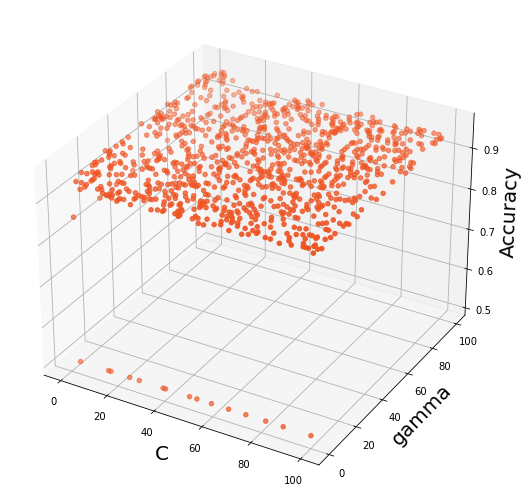

In [28]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(cv.cv_results_['param_gamma'], cv.cv_results_['param_C'], cv.cv_results_['mean_test_score'], color='#ef5423')
ax.set_xlabel('C', fontsize=20)
ax.set_ylabel('gamma', fontsize=20)
ax.set_zlabel('Accuracy', fontsize=20)
plt.show()

In [29]:
cv.best_params_

{'gamma': 3.0312727272727273, 'C': 85.85872727272728}

In [30]:
svm = SVC(gamma=cv.best_params_['gamma'], C=cv.best_params_['C'])
start_time = time.time()
svm.fit(x_train.T, y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Test Accuracy of SVM Algorithm: 98.64%


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 98.64%</font></font>

## Naive Bayes Algorithm

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Accuracy of Naive Bayes: 84.99%


## <font color="magenta">Accuracy of Naive Bayes: <font color="red">84.99%</font></font>

**Decision Tree Algorithm**
<br>
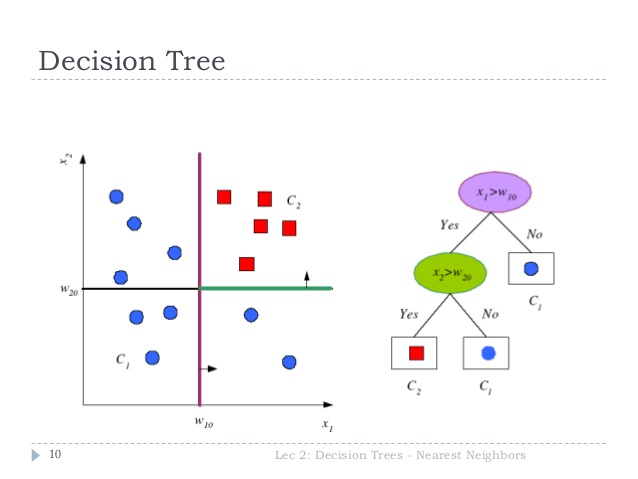

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
start_time = time.time()
dtc.fit(x_train.T, y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Decision Tree Test Accuracy 96.49%


## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">96.49%</font></font>

## Random Forest Classification

In [48]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
start_time = time.time()
rf.fit(x_train.T, y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Time consumed to fit model:  00:00:01
Random Forest Algorithm Accuracy Score : 98.83%


## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">98.83%</font></font>

## Comparing Models

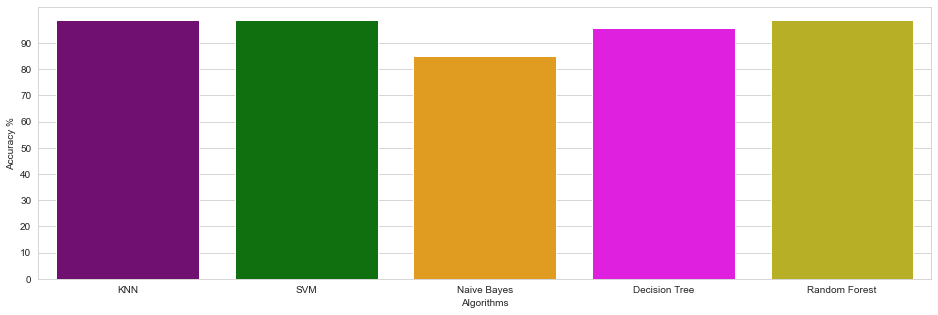

In [34]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Our models work fine but best of them are KNN and Random Forest . Let's look their confusion matrixes.

## Confusion Matrix

In [35]:
# Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3)

knn3.fit(x_train.T, y_train.T)

y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dt = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [36]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dt = confusion_matrix(y_test,y_head_dt)
cm_rf = confusion_matrix(y_test,y_head_rf)

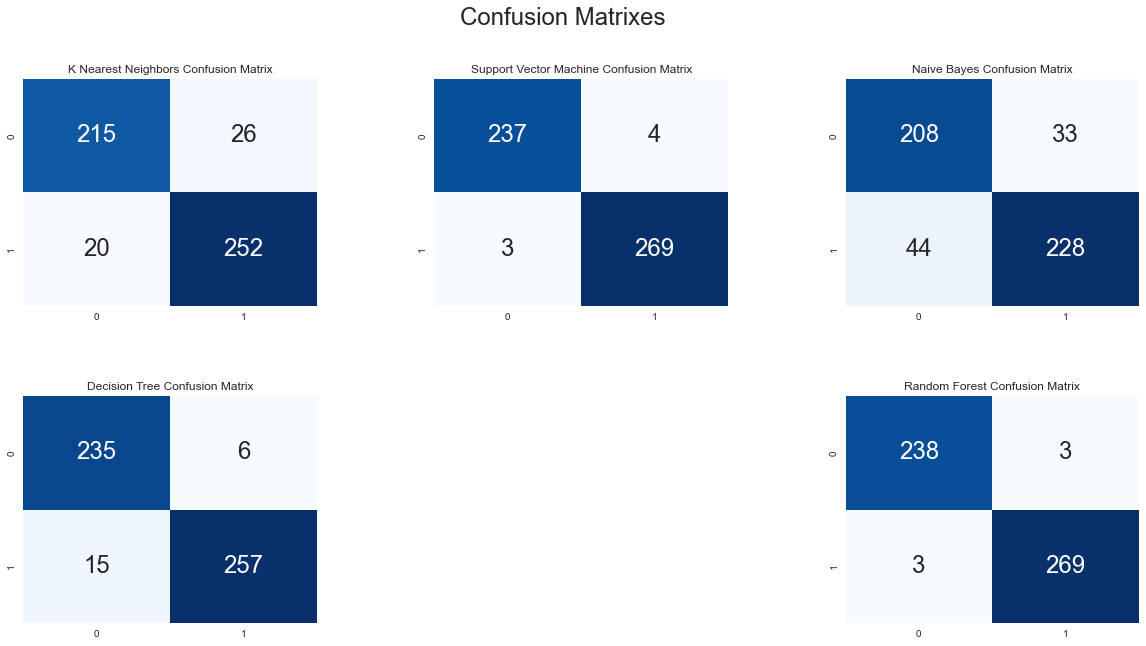

In [46]:
plt.figure(figsize=(20,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()